Currently a work in progress notebook, in future will be full the main notebook.

In [1]:
import wikipedia as wp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Part 1:

Retreaving information from Wikipedia on the average temperature in Italy. We will use that to plot it against the number of new cases to visualy demonstrate a correlation between the number of new cases and temperature. 

Status: Complete ✅

In [2]:
# Wikipedia scrapper

wiki_page = 'Climate_of_Italy'
html = wp.page(wiki_page).html().replace(u'\u2212', '-').replace('(°F)', '')

def dataframe_cleaning(table_number: int):
    global html
    df = pd.read_html(html, encoding='utf-8')[table_number]
    df.drop(np.arange(5, len(df.index)), inplace=True)
    df.columns = df.columns.droplevel()
    df.drop('Year', axis=1, inplace=True)
    
    find = '\((.*?)\)'
    for i, column in enumerate(df.columns):
        if i>0:
            df[column] = (df[column]
                          .str.findall(find)
                          .map(lambda x: (float(x[0])-32)* (5/9)))
    return df

# Setting up all the DataFrames that will be used to plot Italy's average temrpeature with high and low variation. 

potenza_df = dataframe_cleaning(3)
milan_df = dataframe_cleaning(4)
florence_df = dataframe_cleaning(6)

# Constructing aggregated DataFrame for all temperatures in Italy:

concat_df = pd.concat((potenza_df, milan_df, florence_df))

italy_df = pd.DataFrame()
for i, index in enumerate(list(set(concat_df['Month']))):
    if i == 0:
        temp_df = concat_df[concat_df['Month'] == index]
        temp_df = temp_df.groupby('Month').agg(np.max)
    if i in range(1, 4):
        temp_df = concat_df[concat_df['Month'] == index]
        temp_df = temp_df.groupby('Month').agg(np.mean)
    if i == 4:
        temp_df = concat_df[concat_df['Month'] == index]
        temp_df = temp_df.groupby('Month').agg(np.min)
    italy_df = italy_df.append(temp_df)

italy_df = italy_df.apply(lambda x: np.round(x, 2))
italy_df

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Month,,,,,,,,,,,,
Daily mean °C,5.72,7.50,10.28,13.00,17.72,21.39,24.61,24.61,20.50,15.50,9.89,6.78
Record high °C,21.11,22.98,26.33,28.91,33.02,36.54,38.87,37.72,34.20,29.67,23.33,20.54
Average high °C,7.63,9.57,13.24,16.22,21.37,25.41,28.78,28.59,24.28,18.39,12.15,8.46
Average low °C,0.57,1.30,3.72,6.43,10.81,14.37,17.04,17.02,13.70,9.33,4.52,1.67
Record low °C,-23.22,-15.61,-8.00,-3.61,-0.78,4.00,8.00,6.78,1.22,-2.28,-7.22,-13.61


In [3]:
url = 'Daily_Covis19_Italian_Data_Province_Incremental.csv'
covid_data = pd.read_csv(url, error_bad_lines=False)

# Grouping
covid_positive = covid_data.groupby('Date').agg({'Total Positive': np.sum})
covid_positive
covid_positive_2020 = covid_positive.loc['2020-02-24': '2020-12-31']
covid_positive_2021 = covid_positive.loc['2021-01-01': '2021-03-22']
covid_positive_2020

,Total Positive
Date,
2020-02-24,0
2020-02-25,322
2020-02-26,78
2020-02-27,250
2020-02-28,238
...,...
2020-12-27,8913
2020-12-28,8581
2020-12-29,11210


AttributeError: 'AxesSubplot' object has no attribute 'xticks'

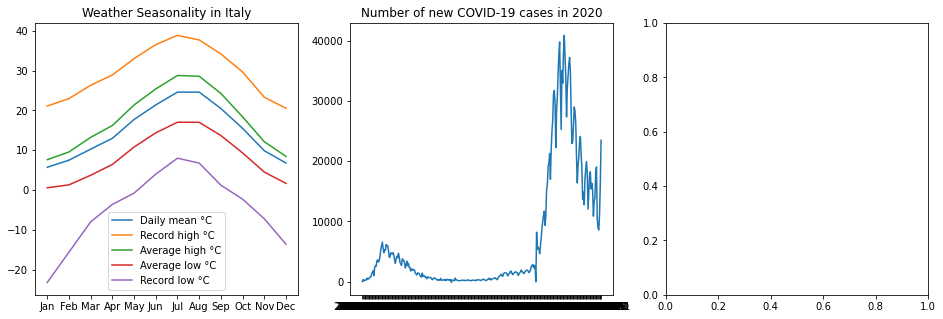

In [18]:
# All recovered data

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=[16, 5])
weather_legend = italy_df.index.tolist()

for data in italy_df.T:
    ax1.plot(italy_df.T[data], label = data)
ax1.legend()
ax1.title.set_text('Weather Seasonality in Italy')

ax2.plot(covid_positive_2020)
ax2.title.set_text('Number of new COVID-19 cases in 2020')
# Setting x-tick labels.
locations = np.arange(0, 365, 30)
ax2.xticks(locations, np.linspace(0, len(locations), len(locations), dtype=int))

ax3.plot(covid_positive_2021)
ax3.title.set_text('Number of new COVID-19 cases in 2021')

plt.show()

In [ ]:
# Creating plot
fig, ax = plt.subplots(figsize=[8, 4.5])

# Plotting
ax.plot(covid_positive_2020['Total Positive'])
ax.plot(covid_positive_2021['Total Positive'])
ax.plot(italy_df.iloc[0], label='Daily mean')
plt.legend()

# Labeling
plt.title('COVID-19 Italy \nNumber of new cases by from Feb 2019')
plt.xlabel('Months')
plt.ylabel('Number of new cases')

# Setting x-tick labels.
locations = np.arange(0, 365, 30)
plt.xticks(locations, np.linspace(0, len(locations), len(locations), dtype=int))


plt.show()